In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
#Reading original dataset
df = pd.read_csv(Path("resources/realtor-data.zip.csv"))
df.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0


In [3]:
df["status"].value_counts()

for_sale          903373
ready_to_build      1593
Name: status, dtype: int64

In [4]:
# Removing ready to build to only view houses for sale
df = df[df["status"] != "ready_to_build"]

In [6]:
df.shape

(903373, 10)

In [5]:
#droping rows with missing values
df= df.dropna()

In [6]:
#Removing states we are not using
df = df[~df["state"].isin(["Puerto Rico","Maine","Delaware","Virgin Islands","Georgia"])]
df.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
24237,for_sale,3.0,3.0,0.45,Agawam,Massachusetts,1001.0,2314.0,2014-06-25,525000.0
24238,for_sale,3.0,2.0,0.36,Agawam,Massachusetts,1001.0,1276.0,2012-10-12,289900.0
24244,for_sale,3.0,2.0,0.46,Agawam,Massachusetts,1001.0,1476.0,1986-11-20,384900.0
24251,for_sale,3.0,2.0,1.76,Agawam,Massachusetts,1001.0,1968.0,2008-09-19,199999.0
24258,for_sale,4.0,2.0,2.00,Pelham,Massachusetts,1002.0,1607.0,2005-07-25,419000.0


In [9]:
df.shape

(220904, 10)

In [7]:
#adding column that shows the price per sqaure foot 
df["price_per_sqfoot"]= (df["price"]/df["house_size"]).round()
df.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price,price_per_sqfoot
24237,for_sale,3.0,3.0,0.45,Agawam,Massachusetts,1001.0,2314.0,2014-06-25,525000.0,227.0
24238,for_sale,3.0,2.0,0.36,Agawam,Massachusetts,1001.0,1276.0,2012-10-12,289900.0,227.0
24244,for_sale,3.0,2.0,0.46,Agawam,Massachusetts,1001.0,1476.0,1986-11-20,384900.0,261.0
24251,for_sale,3.0,2.0,1.76,Agawam,Massachusetts,1001.0,1968.0,2008-09-19,199999.0,102.0
24258,for_sale,4.0,2.0,2.00,Pelham,Massachusetts,1002.0,1607.0,2005-07-25,419000.0,261.0


In [8]:
df.dtypes

status               object
bed                 float64
bath                float64
acre_lot            float64
city                 object
state                object
zip_code            float64
house_size          float64
prev_sold_date       object
price               float64
price_per_sqfoot    float64
dtype: object

In [9]:
# Convert 'prev_sold_date' to datetime data type
df['prev_sold_date'] = pd.to_datetime(df['prev_sold_date'])

In [10]:
# Finding the most recent sold date
most_recent_sold_date = df['prev_sold_date'].max()

most_recent_sold_date

Timestamp('2023-03-01 00:00:00')

In [11]:
#Finding the oldest sold date
oldest_sold_date = df['prev_sold_date'].min()
oldest_sold_date

Timestamp('1901-01-01 00:00:00')

In [12]:
#Filtering dataset to show the past two years from the most recent date
two_years_ago = most_recent_sold_date - pd.DateOffset(years=2)
df = df[df['prev_sold_date']>= two_years_ago]
df.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price,price_per_sqfoot
24268,for_sale,3.0,2.0,0.16,Amherst,Massachusetts,1002.0,1280.0,2021-08-19,275000.0,215.0
25013,for_sale,4.0,3.0,0.46,South Hadley,Massachusetts,1075.0,2108.0,2021-09-21,400000.0,190.0
25062,for_sale,4.0,1.0,0.91,Easthampton,Massachusetts,1027.0,1404.0,2021-09-23,349900.0,249.0
25101,for_sale,3.0,2.0,0.16,Amherst,Massachusetts,1002.0,1280.0,2021-08-19,275000.0,215.0
25181,for_sale,4.0,2.0,0.13,Holyoke,Massachusetts,1040.0,1529.0,2021-03-22,229000.0,150.0


In [13]:
df.shape

(15679, 11)

In [14]:
#Finding the most prevalent zip code for each state
zip_codes_by_state = df.groupby(['state','zip_code']).size().reset_index(name='count')
most_prevalent_zip_codes = zip_codes_by_state.loc[zip_codes_by_state.groupby('state')['count'].idxmax()]
most_prevalent_zip_codes

,state,zip_code,count
26,Connecticut,6082.0,140
170,Massachusetts,1085.0,57
215,New Hampshire,3079.0,72
423,New Jersey,8210.0,241
565,New York,10465.0,69
767,Pennsylvania,19134.0,63
812,Rhode Island,2864.0,151
840,Vermont,5143.0,43


In [15]:
# All unique zip codes for each state
state_zipcodes_df = df.groupby('state')['zip_code'].unique().reset_index()
state_zipcodes_df

,state,zip_code
0,Connecticut,"[6238.0, 6063.0, 6098.0, 6082.0, 6035.0, 6060...."
1,Massachusetts,"[1002.0, 1075.0, 1027.0, 1040.0, 1085.0, 1026...."
2,New Hampshire,"[3431.0, 3465.0, 3461.0, 3031.0, 3062.0, 3064...."
3,New Jersey,"[7001.0, 7003.0, 7002.0, 7006.0, 7018.0, 7008...."
4,New York,"[12521.0, 12029.0, 12037.0, 12075.0, 12513.0, ..."
5,Pennsylvania,"[18301.0, 18360.0, 18336.0, 18337.0, 18328.0, ..."
6,Rhode Island,"[2895.0, 2830.0, 2859.0, 2896.0, 2864.0, 2910...."
7,Vermont,"[5075.0, 5832.0, 5089.0, 5035.0, 5143.0, 5738...."


In [17]:
#Average Price per zip code
average_price_per_zip_code = df.groupby('zip_code')['price'].mean()
average_price_per_zip_code

zip_code
1002.0     275000.0
1026.0     144000.0
1027.0     349900.0
1040.0     229000.0
1069.0     189000.0
             ...   
19319.0    593812.0
19342.0    574000.0
19348.0    354000.0
19355.0    625000.0
19428.0    388750.0
Name: price, Length: 866, dtype: float64

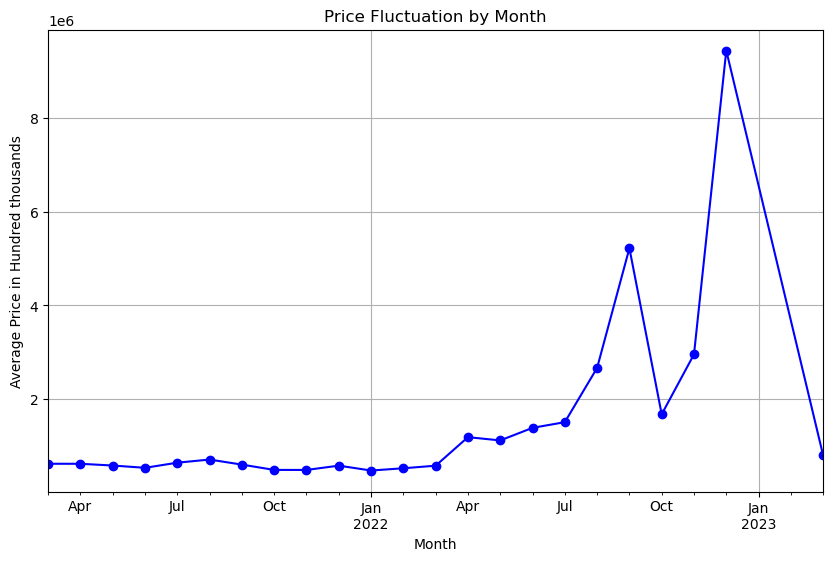

In [18]:
# Showing the fluctuation of price by month for all location in the dataset

# Group by month and calculate the mean price for each month
#We are also adding a month column to the dataset
df['month'] = df['prev_sold_date'].dt.to_period('M')
monthly_avg_price = df.groupby('month')['price'].mean()

# Create a line graph to show price fluctuation by month
plt.figure(figsize=(10, 6))
monthly_avg_price.plot(kind='line', marker='o', linestyle='-', color='b')
plt.xlabel('Month')
plt.ylabel('Average Price in Hundred thousands')
plt.title('Price Fluctuation by Month')
plt.grid(True)

plt.show()



In [19]:
df.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price,price_per_sqfoot,month
24268,for_sale,3.0,2.0,0.16,Amherst,Massachusetts,1002.0,1280.0,2021-08-19,275000.0,215.0,2021-08
25013,for_sale,4.0,3.0,0.46,South Hadley,Massachusetts,1075.0,2108.0,2021-09-21,400000.0,190.0,2021-09
25062,for_sale,4.0,1.0,0.91,Easthampton,Massachusetts,1027.0,1404.0,2021-09-23,349900.0,249.0,2021-09
25101,for_sale,3.0,2.0,0.16,Amherst,Massachusetts,1002.0,1280.0,2021-08-19,275000.0,215.0,2021-08
25181,for_sale,4.0,2.0,0.13,Holyoke,Massachusetts,1040.0,1529.0,2021-03-22,229000.0,150.0,2021-03


In [20]:
#Number of houses sold by month
houses_sold_by_month = df.groupby('month').size().reset_index(name='num_houses_sold')
houses_sold_by_month

,month,num_houses_sold
0,2021-03,1123
1,2021-04,1197
2,2021-05,867
3,2021-06,1050
4,2021-07,979
5,2021-08,1079
6,2021-09,1287
7,2021-10,1330
8,2021-11,1385
9,2021-12,1611


In [21]:
#Finding top ten cities with the most houses for sale
city_count = df["city"].value_counts()

top_ten_cities = city_count.head(10)
top_ten_cities

Philadelphia            650
Providence              306
Bronx                   268
Waterbury               218
Staten Island           209
Hartford                195
East Hartford           187
Pawtucket               177
Cape May Court House    177
Enfield                 160
Name: city, dtype: int64

In [22]:
#Finding top ten Zip codes with the most houses for sale
zip_code_count = df["zip_code"].value_counts()
top_ten_zips = zip_code_count.head(10)
top_ten_zips

8210.0    241
2864.0    151
6082.0    140
8204.0    139
8046.0    115
8016.0    109
2861.0    109
2895.0    109
6108.0    109
8251.0    102
Name: zip_code, dtype: int64

In [35]:
#Finding top ten states with the most houses for sale

# state_count = df["state"].value_counts()
# top_ten_states = state_count.head(10)
# top_ten_states
df["state"].value_counts()

New Jersey       5620
Connecticut      3506
Rhode Island     1782
New York         1396
Pennsylvania     1060
New Hampshire     952
Massachusetts     797
Vermont           566
Name: state, dtype: int64

In [11]:
# # Filter rows with 'acre_lot' between 0.01 and 0.10
# filtered_df = df[(df['acre_lot'] >= 0.01) & (df['acre_lot'] <= 0.10)]
# filtered_df.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,0,80000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,0,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,0.0,0,65000.0
7,for_sale,3.0,2.0,0.08,Ponce,Puerto Rico,731.0,1050.0,0,71600.0
8,for_sale,2.0,1.0,0.09,Ponce,Puerto Rico,730.0,1092.0,0,100000.0


In [29]:
df.head()

,bed,bath,acre_lot,state,zip_code,house_size,prev_sold_date,price,price_per_sqfoot,month
24268,3.0,2.0,0.16,Massachusetts,1002.0,1280.0,2021-08-19,275000.0,215.0,2021-08
25013,4.0,3.0,0.46,Massachusetts,1075.0,2108.0,2021-09-21,400000.0,190.0,2021-09
25062,4.0,1.0,0.91,Massachusetts,1027.0,1404.0,2021-09-23,349900.0,249.0,2021-09
25101,3.0,2.0,0.16,Massachusetts,1002.0,1280.0,2021-08-19,275000.0,215.0,2021-08
25181,4.0,2.0,0.13,Massachusetts,1040.0,1529.0,2021-03-22,229000.0,150.0,2021-03


In [30]:
df.to_csv("resources/clean_real_estate_data.csv")